In [1]:
import pandas as pd
#url="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
url="C:\\Users\\Admin\\Desktop\\440 project\\wbc2.csv"
#bc --> Breast Cancer
bc=pd.read_csv(url)
bc # this the raw dataset

,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension,tumor cells
0,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,0.242,0.079,M
1,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,M
2,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,M
3,20.38,77.58,386.1,0.142,0.284,0.241,0.105,0.260,0.097,M
4,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,M
...,...,...,...,...,...,...,...,...,...,...
564,22.39,142.00,1479.0,0.111,0.116,0.244,0.139,0.173,0.056,M
565,28.25,131.20,1261.0,0.098,0.103,0.144,0.098,0.175,0.055,M
566,28.08,108.30,858.1,0.085,0.102,0.093,0.053,0.159,0.056,M
567,29.33,140.10,1265.0,0.118,0.277,0.351,0.152,0.240,0.070,M


In [2]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# FIRST - Assigning numerical values and storing in the same column
bc['tumor cells']= labelencoder.fit_transform(bc['tumor cells'])
#M=1 B=0

In [3]:
#SECOND - HANDLE OUTLIERS
Q1 = bc.quantile(0.25)
Q3 = bc.quantile(0.75)
IQR = Q3 - Q1
IQR


Texture                5.630
Perimeter             28.930
Area                 362.400
Smoothness             0.019
Compactness            0.065
Concavity              0.101
Concave_points         0.054
Symmetry               0.034
Fractal_dimension      0.008
tumor cells            1.000
dtype: float64

In [4]:
outlier = ( bc.min() < Q1-1.5*IQR) | (bc.max() > Q3+1.5*IQR)
outlier

Texture               True
Perimeter             True
Area                  True
Smoothness            True
Compactness           True
Concavity             True
Concave_points        True
Symmetry              True
Fractal_dimension     True
tumor cells          False
dtype: bool

In [5]:
#all the rows that has outliers will be True
outlier_index = ((bc < (Q1 - 1.5 * IQR)) |(bc > (Q3 + 1.5 * IQR))).any(axis=1)

outlier_index

0       True
1      False
2      False
3       True
4      False
       ...  
564     True
565    False
566    False
567     True
568     True
Length: 569, dtype: bool

In [6]:
print(outlier_index.value_counts())

False    501
True      68
dtype: int64


In [7]:
index_numbers = bc[outlier_index].index
index_numbers

Int64Index([  0,   3,   9,  12,  14,  22,  23,  25,  60,  68,  71,  78,  82,
            105, 108, 112, 122, 146, 150, 151, 152, 164, 176, 180, 181, 190,
            202, 212, 219, 232, 236, 239, 250, 257, 258, 259, 265, 272, 288,
            318, 323, 339, 351, 352, 368, 369, 372, 373, 376, 379, 393, 400,
            424, 449, 455, 461, 503, 504, 505, 507, 520, 521, 561, 562, 563,
            564, 567, 568],
           dtype='int64')

In [8]:
#dropped the outliers from bc
bc=bc.drop(index_numbers)
bc ##the new dataset after dropping outliers


,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension,tumor cells
1,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,0.181,0.057,1
2,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,0.207,0.060,1
4,14.34,135.10,1297.0,0.100,0.133,0.198,0.104,0.181,0.059,1
5,15.70,82.57,477.1,0.128,0.170,0.158,0.081,0.209,0.076,1
6,19.98,119.60,1040.0,0.095,0.109,0.113,0.074,0.179,0.057,1
...,...,...,...,...,...,...,...,...,...,...
558,22.68,96.39,657.1,0.085,0.133,0.103,0.037,0.145,0.061,0
559,23.93,74.52,403.5,0.093,0.102,0.111,0.041,0.139,0.066,0
560,27.15,91.38,600.4,0.099,0.113,0.045,0.043,0.154,0.062,0
565,28.25,131.20,1261.0,0.098,0.103,0.144,0.098,0.175,0.055,1


In [9]:
from sklearn.model_selection import train_test_split
#THIRD - Spliting the data
train_set1, test_set1 = train_test_split(bc, test_size=0.2, random_state=42)
train_set2, test_set2 = train_test_split(bc, test_size=0.2, random_state=42,stratify=bc['tumor cells'])

In [10]:
##FOURTH split the data + scale the X for the train and test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#using StandardScaler to scale train (StandardScaler is good with dealing with outliers)

train_X = train_set2.drop("tumor cells", axis=1)
scaler.fit(train_X)
scaled=scaler.transform(train_X)

train_y = train_set2["tumor cells"].copy()
test_X = test_set2.drop("tumor cells", axis=1)
test_y = test_set2["tumor cells"].copy()

#train X after scaling AND dropping outliers
trainX_scaled = pd.DataFrame(scaled, columns=train_X.columns)
trainX_scaled

,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave_points,Symmetry,Fractal_dimension
0,1.470078,1.387339,1.425359,0.833424,1.656265,2.521375,2.051428,-1.072623,0.383304
1,-0.414445,-0.410869,-0.422292,-0.680082,-0.960482,-0.710823,-0.604885,0.090718,-0.666844
2,-1.463071,-1.015508,-0.896135,-1.556323,-1.380149,-1.180013,-1.129589,-1.520062,-0.841868
3,-1.012587,-0.202058,-0.201340,-1.635981,-1.034541,-0.658691,-0.506503,-1.743781,-1.541966
4,-0.617163,-0.076872,-0.125811,-1.397006,-0.787678,-0.901974,-0.801649,-1.922757,-0.316794
...,...,...,...,...,...,...,...,...,...
395,-0.014015,-0.779836,-0.737561,0.036842,-0.935795,-0.710823,-0.604885,0.627645,-0.491819
396,-0.009010,1.017358,0.750855,0.992741,2.149990,2.156449,1.625106,0.448669,0.908377
397,-0.829891,-1.621162,-1.368851,-0.919057,-0.392697,-0.415407,-0.572091,0.672389,0.733353
398,0.256275,0.586559,0.376966,0.753766,1.532833,1.722014,1.526724,0.359182,0.208279


In [11]:
train_X.to_csv('train_X.csv',index=False)
train_y.to_csv('train_y.csv',index=False)



In [12]:
##scaling testX
scaled=scaler.transform(test_X)

test_X.to_csv('test_X.csv',index=False)
test_y.to_csv('test_y.csv',index=False)


In [13]:
# Handlig outliers 


Accuracy for 8 features is 0.895

Accuracy for 9 features is 0.905

Number of selected features:  9

Ranking of features:
 [1 1 1 1 1 1 1 1 1]


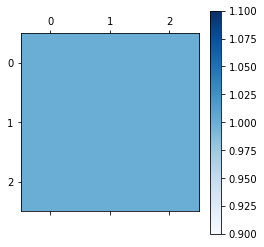

In [14]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
svc = SVC(kernel="linear")

#selecting 8 features and it's Accuracy result.
rfe1 = RFE(estimator=svc, n_features_to_select=8, step=1)
rfe1.fit(train_X, train_y)
pred=rfe1.predict(train_X)
Accuracy=accuracy_score(train_y,pred)
print("Accuracy for 8 features is",Accuracy)

#selecting 9 features and it's Accuracy result.
rfe1 = RFE(estimator=svc, n_features_to_select=9, step=1)
rfe1.fit(train_X, train_y)


pred=rfe1.predict(train_X)
Accuracy=accuracy_score(train_y,pred)
print("\nAccuracy for 9 features is",Accuracy)
#our dataset features are all important so selecting all of it gets the best accuracy

print("\nNumber of selected features: ",rfe1.n_features_)
print("\nRanking of features:\n",rfe1.ranking_) #since we're using all the features all of it will be ranked 1

ranking = rfe1.ranking_.reshape(3, 3)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
#plt.title("Ranking of pixels with RFE")
plt.show()


# (SGD) classifier

**accuracy** 

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_X, train_y)

SGDClassifier(random_state=42)

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd_clf, train_X, train_y, cv=10, scoring="accuracy")
print("accuracy of each fold",scores)
print("mean of accuracy",scores.mean())

accuracy of each fold [0.85  0.85  0.75  0.8   0.85  0.8   0.65  0.925 0.875 0.75 ]
mean of accuracy 0.8099999999999999


**Confusion Matrix**

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, train_X, train_y, cv=10)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_y, y_train_pred) #the right prediction, the model prediction
#230,94 correct, and 37,94 false 

array([[230,  39],
       [ 37,  94]], dtype=int64)

**Precision and Recall**

In [19]:
from sklearn.metrics import precision_score, recall_score
precision_score(train_y, y_train_pred)

0.706766917293233

In [20]:
recall_score(train_y, y_train_pred)

0.7175572519083969

In [21]:
from sklearn.metrics import f1_score
f1_score(train_y, y_train_pred)

0.712121212121212

In [22]:
y_scores = cross_val_predict(sgd_clf, train_X, train_y, cv=10, method="decision_function")

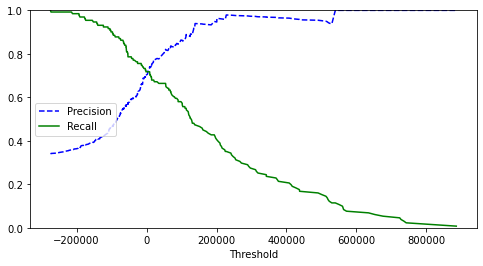

In [23]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(train_y, y_scores)

%matplotlib inline
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

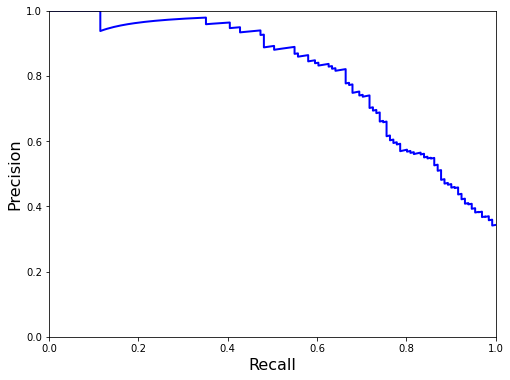

In [24]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.savefig('recall vs precision.png', dpi=300)
plt.show()

***The ROC Curve***

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_y, y_scores)

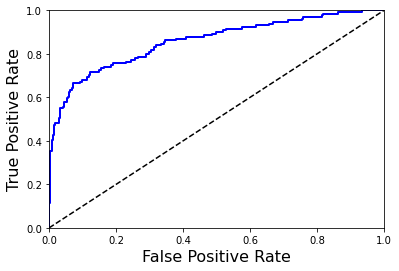

In [26]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr,"b-", linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plot_roc_curve(fpr, tpr)
plt.show()

# RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, train_X, train_y, cv=10, method="predict_proba")
print("accuracy of each fold",scores)
print("mean of accuracy",scores.mean())

accuracy of each fold [0.85  0.85  0.75  0.8   0.85  0.8   0.65  0.925 0.875 0.75 ]
mean of accuracy 0.8099999999999999


In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring="accuracy")
print("accuracy of each fold",scores)
print("mean of accuracy",scores.mean())

accuracy of each fold [0.9   0.875 0.9   0.95  0.95  0.95  0.95  0.95  0.9   0.975]
mean of accuracy 0.9299999999999999


In [29]:
y_train_pred_forest = cross_val_predict(forest_clf, train_X, train_y, cv=10)

In [30]:
recall_score(train_y, y_train_pred_forest)

0.8778625954198473

In [31]:
precision_score(train_y, y_train_pred_forest)

0.905511811023622

In [32]:
confusion_matrix(train_y, y_train_pred_forest)

array([[257,  12],
       [ 16, 115]], dtype=int64)

In [33]:
from sklearn.metrics import f1_score
f1_score(train_y, y_train_pred_forest)

0.8914728682170543

In [34]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_y,y_scores_forest)

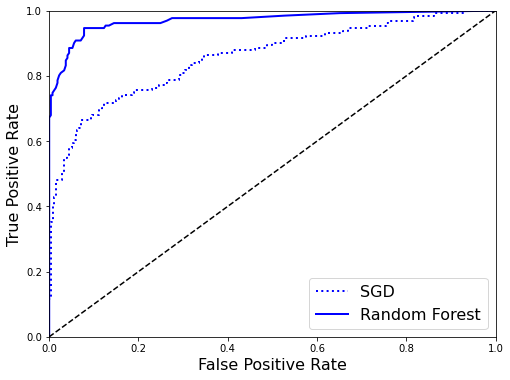

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

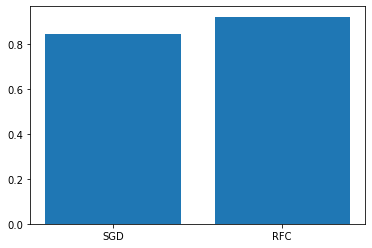

In [36]:
classifiers=['SGD','RFC']
precision=[0.8449,0.9221]
plt.bar(classifiers,precision)
plt.show()


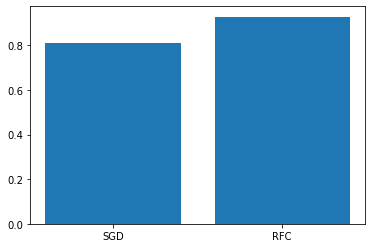

In [37]:
classifiers=['SGD','RFC']
Accuracy=[0.809,0.929]
plt.bar(classifiers,Accuracy)
plt.show()

# Evaluating on the test set

In [38]:
from sklearn.metrics import accuracy_score
#RANDOM FOREST ON TEST
forest_clf.fit(test_X, test_y)
final_predictions = forest_clf.predict(test_X)

#(1)acuuracy 
accuracy_score(test_y, final_predictions)


1.0

In [39]:
#(2)confusing matrix
confusion_matrix(test_y, final_predictions)

array([[68,  0],
       [ 0, 33]], dtype=int64)

In [40]:
#(3)precision 
precision_score(test_y, final_predictions)

1.0

In [41]:
#(4)recall
recall_score(test_y, final_predictions)

1.0

In [42]:
#(5)f1
from sklearn.metrics import f1_score
f1_score(test_y, final_predictions)

1.0

In [43]:
#SGD ON TEST
sgd_clf.fit(test_X, test_y)
final_predictions = sgd_clf.predict(test_X)
#(1)acuuracy 
accuracy_score(test_y, final_predictions)


0.7821782178217822

In [44]:
#(2)confusing matrix
confusion_matrix(test_y, final_predictions)

array([[47, 21],
       [ 1, 32]], dtype=int64)

In [45]:
#(3)precision 
precision_score(test_y, final_predictions)

0.6037735849056604

In [46]:
#(4)recall
recall_score(test_y, final_predictions)

0.9696969696969697

In [47]:
#(5)f1
from sklearn.metrics import f1_score
f1_score(test_y, final_predictions)

0.7441860465116279